In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
from sklearn.metrics import  auc,  accuracy_score

In [3]:
data = pd.read_csv("puchkov.k@phystech.edu.csv", header=None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
9,0.0,1.199516,-2.189934,-0.862396,0.155618,0.213702,-0.230610,1.029912,0.427943,-0.512698,-0.821067
890,0.0,0.024096,1.236949,-0.040236,-1.502897,0.745628,0.278429,0.400552,-2.106884,-0.238901,0.888142
618,0.0,0.193697,-1.550387,0.888964,0.218206,-0.201453,1.755730,-1.459480,0.155783,-1.021813,-1.470511
972,1.0,0.055252,-1.371743,0.556483,-0.394630,-0.772055,-0.211603,-1.892741,1.376261,1.702858,2.143435
4,0.0,0.481452,-1.043335,0.455585,0.747813,-0.754433,-1.375387,-0.319882,-0.035071,-0.604874,-0.004786


In [4]:
column_names = list(map(lambda num: f"X{num - 1}", data.columns))
column_names[0] = 'Y'
column_names

['Y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']

In [5]:
data.columns = column_names
data.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.489000,0.002714,-0.004323,0.034049,-0.000228,0.008352,-0.012202,0.010559,-0.031931,-0.055138,0.045639
std,0.500129,0.984356,1.009666,1.002280,1.031709,1.021477,0.977746,1.007578,0.996118,0.988348,1.008778
min,0.000000,-2.884090,-3.063602,-2.989517,-3.194757,-3.165991,-3.296268,-2.789797,-3.693899,-3.306330,-3.262003
25%,0.000000,-0.656741,-0.666798,-0.652228,-0.693203,-0.698233,-0.631178,-0.644939,-0.688157,-0.745083,-0.629610
50%,0.000000,-0.022630,-0.002235,0.026396,-0.010131,0.014361,-0.007937,0.038990,-0.022332,-0.062608,0.034694
75%,1.000000,0.749966,0.673662,0.712031,0.706913,0.674014,0.687510,0.710347,0.645521,0.619124,0.689879
max,1.000000,2.933951,3.288487,3.144040,3.128388,2.871982,2.878286,3.464959,3.052889,2.837699,3.256963


### Постройте модель логистической регрессии $Y$ от $X$ и свободного коэффициента.

In [6]:
X = data.drop('Y', axis=1)
y = data['Y']
print(X.shape, y.shape)

(1000, 10) (1000,)


In [7]:
logit_model = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.325007
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.5309
Time:                        14:59:45   Log-Likelihood:                -325.01
converged:                       True   LL-Null:                       -692.91
Covariance Type:            nonrobust   LLR p-value:                1.292e-151
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0816      0.099     -0.821      0.412      -0.277       0.113
X0             0.0310      0.102      0.303      0.762      -0.170       0.232
X1            -0.1360      0.097     -1.407      0.159      -0.325       0.053
X2            -0.0303      0.099     -0.305      0.761      -0.225       0.164
X3             0.2328      0.098      2.371      0.018       0.040       0.425
X4            -0.0131      0.099     -0.133      0.894      -0.207       0.180
X5             1.6327      0.138     11.870      0.000       1.363       1.902
X6             1.4607      0.128     11.378      0.000       1.209       1.712
X7             1.5097      0.136     11.140      0.000       1.244       1.775
X8             1.4756      0.135     10.937      0.000       1.211       1.740
X9             1.6726      0.140     11.908      0.000       1.397       1.948
==============================================================================
"""

In [18]:
model = sm.GLM.from_formula('Y ~ X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9', 
                             data=data, family=sm.families.Gaussian()).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            775.2683  
Link Function:      identity         BIC:            -6707.4142
Dependent Variable: Y                Log-Likelihood: -376.63   
Date:               2021-03-31 13:01 LL-Null:        -875.81   
No. Observations:   1000             Deviance:       124.36    
Df Model:           10               Pearson chi2:   124.      
Df Residuals:       989              Scale:          0.12574   
Method:             IRLS                                       
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept     0.4944    0.0113  43.9131  0.0000   0.4723  0.5164
X0            0.0010    0.0114   0.0865  0.9311  -0.0214  0.0234
X1           -0.0201    0.0111  -1.8068  0.0708  -0.0420  0.0017
X2           -0.0001    0.0112  -0.0069  0.9945  -0.0221  0.0219
X3            0.0201    0.0109   1.8382  0.0660  -0.0013  0.0415
X4           -0.0056    0.0110  -0.5090  0.6107  -0.0272  0.0160
X5            0.1678    0.0115  14.5752  0.0000   0.1452  0.1904
X6            0.1484    0.0112  13.3074  0.0000   0.1265  0.1702
X7            0.1457    0.0113  12.8888  0.0000   0.1235  0.1678
X8            0.1443    0.0114  12.6694  0.0000   0.1220  0.1666
X9            0.1687    0.0112  15.0850  0.0000   0.1468  0.1907
===============================================================

"""

### Каково отношение шансов $Y=1$ к событию $f(X) = 1$, где $f(X)$ - отклик? 

In [8]:
p_endog = y.sum()
p_endog_normed = p_endog / len(y)
f = logit_model.predict(sm.add_constant(X))
response = list(map(round, f))
p_resp = len(list(filter(lambda x: x == 1, response)))
p_resp_normed = p_resp / len(response)
OR = (p_endog_normed / (1 - p_endog_normed)) * ((1 - p_resp_normed) / p_resp_normed)
OR.round(2)

0.97

### Какова точность (accuracy) классификации модели при пороге вероятности для классификации $p_0 = 0.5$ ?

In [10]:
accuracy_score(y, response).round(2)

0.84

0.41


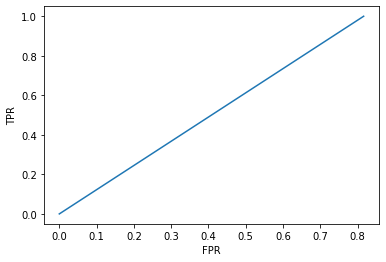

In [22]:
tp, tn = [],[]
fp, fn = [], []
labels = (data['Y']==1)*1.0
probas = model.predict(data)
threshold = 0,5
for t in threshold:
    tp_ = (probas[labels==1]>=t)
    tn_ = (probas[labels==0]<t)
    fp_ = (probas[labels==0]>=t)
    fn_ = (probas[labels==1]<t)
    
    tp.append(tp_)
    tn.append(tn_)
    fp.append(fp_)
    fn.append(fn_)
    
plt.plot(list(map(np.mean, fp)), list(map(np.mean, tp)))
plt.xlabel('FPR')
plt.ylabel('TPR')
print(auc(list(map(np.mean, fp)), list(map(np.mean, tp))).round(2))

### Постройте модель логистической регрессии $Y$ от $X$ и свободного коэффициента для первых 200 элементов выборки.

In [8]:
data2=data[:200]
data2.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,0.010838,0.021625,0.027441,0.050632,-0.018289,0.032794,0.045018,0.020069,-0.143270,0.139262
std,0.501255,1.017085,1.029634,0.907382,1.048897,1.059413,1.005205,0.994442,0.905366,1.013587,1.028988
min,0.000000,-2.313998,-2.929895,-2.030024,-2.481679,-2.904579,-2.401273,-2.789797,-2.388263,-3.306330,-2.505789
25%,0.000000,-0.675084,-0.696990,-0.606612,-0.674126,-0.718458,-0.522310,-0.624826,-0.479474,-0.821972,-0.538337
50%,0.500000,0.016637,0.029069,0.020279,0.079630,0.086693,-0.002699,0.107466,-0.028938,-0.194537,0.107217
75%,1.000000,0.832871,0.684976,0.606529,0.754317,0.681445,0.734262,0.767770,0.586515,0.616667,0.845919
max,1.000000,2.488148,2.631543,2.547566,2.561889,2.871982,2.878286,2.298097,2.664445,2.837699,2.902184


In [9]:
model_200 = sm.GLM.from_formula('Y ~ X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9', 
                             data=data, family=sm.families.Gaussian()).fit()
model_200.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            775.2683  
Link Function:      identity         BIC:            -6707.4142
Dependent Variable: Y                Log-Likelihood: -376.63   
Date:               2021-03-31 12:42 LL-Null:        -875.81   
No. Observations:   1000             Deviance:       124.36    
Df Model:           10               Pearson chi2:   124.      
Df Residuals:       989              Scale:          0.12574   
Method:             IRLS                                       
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept     0.4944    0.0113  43.9131  0.0000   0.4723  0.5164
X0            0.0010    0.0114   0.0865  0.9311  -0.0214  0.0234
X1           -0.0201    0.0111  -1.8068  0.0708  -0.0420  0.0017
X2           -0.0001    0.0112  -0.0069  0.9945  -0.0221  0.0219
X3            0.0201    0.0109   1.8382  0.0660  -0.0013  0.0415
X4           -0.0056    0.0110  -0.5090  0.6107  -0.0272  0.0160
X5            0.1678    0.0115  14.5752  0.0000   0.1452  0.1904
X6            0.1484    0.0112  13.3074  0.0000   0.1265  0.1702
X7            0.1457    0.0113  12.8888  0.0000   0.1235  0.1678
X8            0.1443    0.0114  12.6694  0.0000   0.1220  0.1666
X9            0.1687    0.0112  15.0850  0.0000   0.1468  0.1907
===============================================================

"""

### Имеет ли смысл данная модель согласно критерию Вальда?

Значит проверить гипотезу о равенстве нулю всех коэффицциентов критерием Вальда.

In [14]:
model_200.wald_test('X0 = X1 = X2 = X3 = X4 = X5 = X6 = X7 = X8 = X9 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[998.28499624]], p-value=4.3786640104743135e-208, df_denom=10>

**$p-value < 0.05$, значит нулевая гипотеза отвергается $\rightarrow$ модель имеет смысл.**

### Можно ли обнулить первые четыре переменные согласно критерию Вальда? $(p-value=0.05)$

In [15]:
model_200.wald_test('X0 = X1 = X2 = X3 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[6.86767356]], p-value=0.1430485093239147, df_denom=4>

**$p-value > 0.05$, значит данные не противоречат гипотезе $\rightarrow$ первые 4 переменные можно занулить.**